## Distribuição qui-quadrado

Uma variável aleatória X é dita possuir distribuição Qui-Quadrado com parâmetro k > 0 se sua fdp é da forma:

$$
f(x) = \frac{1}{2^{\frac{k}{2}} Γ(\frac{k}{2})} x^{\frac{k}{2-1}}e^{-x/2} I(X)_{(0, ∞)}$$

- k é chamado de graus de liberdade

In [1]:
# importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
# definindo variável
X = chi2(df = 8)

Criando função de esboço de gráfico:

In [3]:
# Função para esboçar a densidade:
def PlotX2(n, k):
  x = np.linspace(0, n, 100)  # Gera 100 pontos igualmente espaçados entre 0 e n

  # Se k não for uma lista
  if k is not list:
    X = chi2(df = k)  # Cria uma distribuição qui-quadrado com k graus de liberdade
    probabilidades = [X.pdf(i) for i in x]  # Calcula a densidade para cada valor de x

    fig, ax = plt.subplots()  # Cria a figura e os eixos
    ax.plot(x,probabilidades,linewidth=2.0)  # Plota a curva de densidade
    ax.grid(True)  # Ativa a grade no gráfico
    fig.show()  # Mostra o gráfico

  else:
    for k_ in k:  # Para cada valor de k na lista
      X = chi2(df = k_)  # Cria a distribuição qui-quadrado
      probabilidades = [X.pdf(i) for i in x]  # Calcula a densidade

      fig, ax = plt.subplots()  # Cria uma nova figura para cada curva
      ax.plot(x,probabilidades,linewidth = 2.0,label = f"k = {k_}")  # Plota a curva
      ax.grid(True)  # Ativa a grade

    fig.show()  # Mostra a última figura

C:\Users\Mateus\AppData\Local\Temp\ipykernel_16964\3605696434.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # Mostra o gráfico


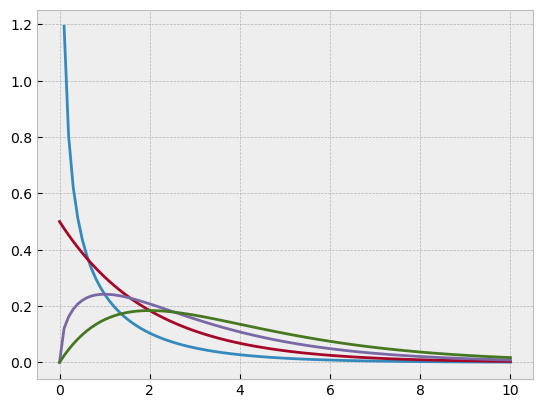

In [4]:
# plotando gráfico com parâmetros k = [1,2,3,4]
plt.style.use('bmh')
PlotX2(10,k = [1,2,3,4])

- O gráfico esboça a densidade da distribuição Qui-Quadrado para k = 1,2,3,4.

C:\Users\Mateus\AppData\Local\Temp\ipykernel_16964\3605696434.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # Mostra o gráfico


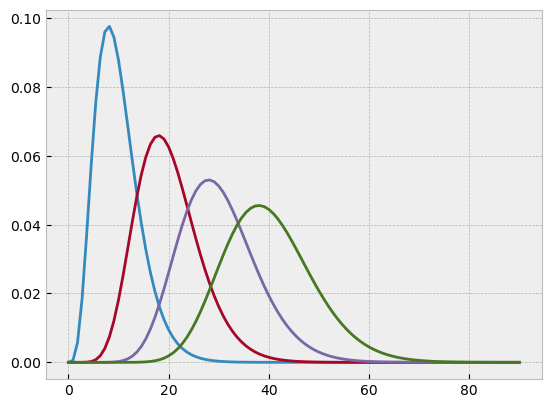

In [5]:
# Esboçando gráfico com k = 10,20,30,40
PlotX2(90,k = [10,20,30,40])

- Observamos que o gráfico dos parâmetros acima de 3 vai começar na Origem.

### Função de distribuição acumulada:


$$
F(X) = \int_{0}^{x} \frac{1}{2^{k/2}\gamma(\frac{k}{2})}t^{k/2-1}e^{-t/2}dt
$$

Esta função não possui forma fechada para alguns valores de k.

In [6]:
# usando a função de distribuição acumulada
X.cdf(2) # k = 8

0.01898815687615381

### Momentos, Assimetria e Curtose

O r-ésimo momento em relação á origem é dados por:

$$
E(X^r) = \frac{2^r\gamma(r+\frac{k}{2})}{\gamma(\frac{k}{2})}
$$

In [7]:
# Acessando O r-ésimo momento:

# primeiro momento:
r1 = X.moment(1)

# esperança:
EX = X.mean()
r1 == EX

True

Assimetria é dada por:

$$
\alpha_{3} = \sqrt{\frac{8}{k}}
$$

In [8]:
# Calculando a assimetria de X:
X.moment(3)

960.0

Curtose é dada por:

$$
\alpha_{4} = 3 + \frac{12}{k}
$$

### Moda

$$

M_{o} = k - 2, k\geq 3

$$
Para k = 1 não existe moda e k = 2 a moda é o ponto zero.

In [1]:
# função Moda:
def Moda_chi2(k = int):
    return k - 2 if k >= 3 else None

In [2]:
Moda_chi2(5)

3

### Funções geradora de momentos

A função geradora de momentos é dada por:

$$

M_{X}(t) = (\frac{1}{1-2t})^{k/2}, t < 1/2

$$

In [9]:
# importando biblioteca sympy
import sympy as sy

In [10]:
def Mxt(t = int, k = int):
    T = sy.Symbol("T")
    funcao = (1/1-2*T)**k/2
    
    derivada = funcao.subs(T,0)
    return derivada
    

In [11]:
Mxt(1,2)

0.500000000000000